**MLxtend:** *Specifically designed for pattern mining and machine learning extensions. It offers more detailed control over the association rule mining process. Generally faster and more memory-efficient, especially for larger datasets. Offers some visualization capabilities, but may require more custom coding.*


*Install mlxtend*

In [1]:
!pip install mlxtend

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*Unzip the data uploaded*

In [6]:
!unzip /content/online+retail.zip


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Archive:  /content/online+retail.zip
 extracting: Online Retail.xlsx      


* Load Data*

In [4]:
# Load data
data = pd.read_excel('Online Retail.xlsx')

# Preview data
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


*Preprocess the Data*

In [5]:
# Convert 'InvoiceNo' to string before filtering
data['InvoiceNo'] = data['InvoiceNo'].astype(str)

# Now remove canceled orders
data = data[~data['InvoiceNo'].str.contains('C')]


basket = data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

def encode_units(x):
    return 1 if x >= 1 else 0
basket_sets = basket.applymap(encode_units)
print(basket_sets.head())

print(basket_sets.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-5-ed0992b6b911>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


Description  20713   4 PURPLE FLOCK DINNER CANDLES  \
InvoiceNo                                            
536365           0                               0   
536366           0                               0   
536367           0                               0   
536368           0                               0   
536369           0                               0   

Description   50'S CHRISTMAS GIFT BAG LARGE   DOLLY GIRL BEAKER  \
InvoiceNo                                                         
536365                                    0                   0   
536366                                    0                   0   
536367                                    0                   0   
536368                                    0                   0   
536369                                    0                   0   

Description   I LOVE LONDON MINI BACKPACK   I LOVE LONDON MINI RUCKSACK  \
InvoiceNo                                                                 
5

*Association Rule Mining with mlxtend*

In [6]:
from mlxtend.frequent_patterns import apriori, association_rules
basket_sets_sample = basket_sets.sample(frac=0.1, random_state=42)  # Use 10% of the data
frequent_itemsets = apriori(basket_sets_sample, min_support=0.01, use_colnames=True)
#frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(3 PIECE SPACEBOY COOKIE CUTTER SET),(SET OF 3 BUTTERFLY COOKIE CUTTERS),0.020864,0.037361,0.011645,0.558140,14.939293,0.010865,2.178605,0.952944
1,(SET OF 3 BUTTERFLY COOKIE CUTTERS),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.037361,0.020864,0.011645,0.311688,14.939293,0.010865,1.422519,0.969275
2,(6 GIFT TAGS 50'S CHRISTMAS ),(6 GIFT TAGS VINTAGE CHRISTMAS ),0.019893,0.017467,0.010674,0.536585,30.719512,0.010327,2.120202,0.987084
3,(6 GIFT TAGS VINTAGE CHRISTMAS ),(6 GIFT TAGS 50'S CHRISTMAS ),0.017467,0.019893,0.010674,0.611111,30.719512,0.010327,2.520274,0.984646
4,(6 GIFT TAGS 50'S CHRISTMAS ),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.019893,0.056769,0.010189,0.512195,9.022514,0.009060,1.933624,0.907214


In [7]:
print(rules.shape)
print(rules.columns)

(4212, 10)
Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Visualization:** *You can use matplotlib to visualize the rules*

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


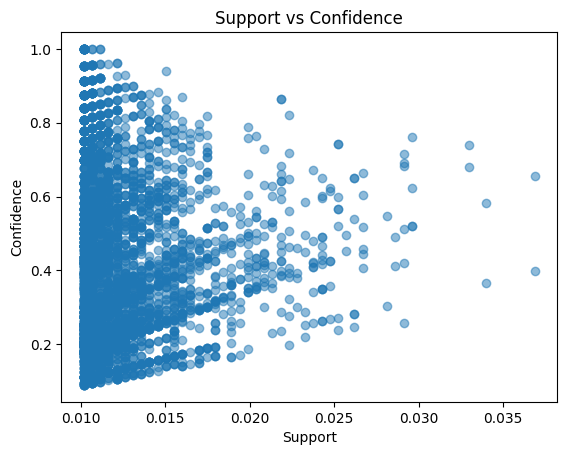

In [8]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()
